In [1]:
## Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
rcParams['figure.figsize'] = 8, 5
sns.set_style('darkgrid')

In [2]:
car_data = pd.read_csv("car_data.csv")
car_data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [3]:
car_data.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Based on the previous output, nothing is missing, since there are 205 non-null objects in each column of the dataframe and 205 total rows in the dataframe itself.

In [5]:
car_list = []
for car in car_data.CarName:
    car_list.append(car.split(" ")[0].lower())
car_data['car_company'] = car_list
car_data.car_company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [6]:
car_list = []
for car in car_data.CarName:
    car = car.split(" ")[0].lower()
    if car == "maxda":
        car = "mazda"
    elif car == 'vw':
        car = "volkswagen"
    elif car == "toyouta":
        car = 'toyota'
    elif car == "porcshce":
        car = 'porsche'
    elif car == "vokswagen":
        car = 'volkswagen'
    car_list.append(car)
car_data['car_company'] = car_list
car_data.car_company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

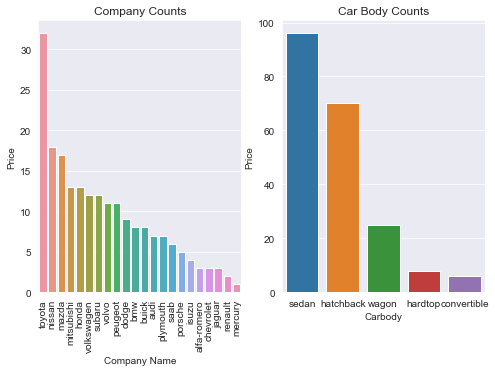

In [7]:
fig,axes = plt.subplots(nrows = 1, ncols = 2)
sns.barplot(ax=axes[0],x = car_data.car_company.value_counts().index,y = car_data.car_company.value_counts().values)
axes[0].set_title('Company Counts')
axes[0].set_ylabel("Price")
axes[0].set_xlabel('Company Name')
axes[0].tick_params(axis = 'x',rotation=90)

sns.barplot(ax=axes[1],x = car_data.carbody.value_counts().index,y = car_data.carbody.value_counts().values)
axes[1].set_title("Car Body Counts")
axes[1].set_ylabel("Price")
axes[1].set_xlabel("Carbody")

plt.show()

Based on the above graphs, we can conclude that Toyota is the most preferred car company in the dataframe.
Additionally, the most popular type of car is a sedan.

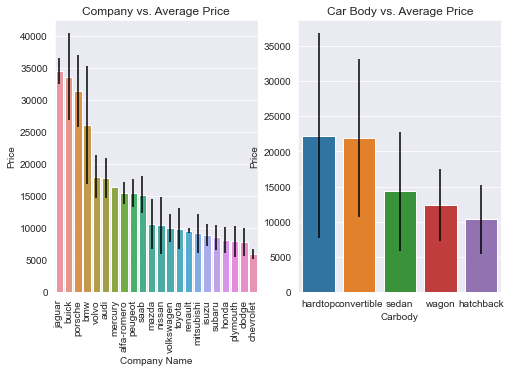

In [8]:
fig,axes = plt.subplots(nrows = 1, ncols = 2)
sns.barplot(ax=axes[0],x = car_data.groupby("car_company").mean().sort_values("price",ascending = False).index,y = car_data.groupby("car_company").mean().sort_values("price",ascending = False).price,yerr = car_data.groupby("car_company").std().loc[car_data.groupby("car_company").mean().sort_values("price",ascending = False).index]['price'])
axes[0].set_title('Company vs. Average Price')
axes[0].set_xlabel('Company Name')
axes[0].set_ylabel("Price")
axes[0].tick_params(axis = 'x',rotation=90)

sns.barplot(ax=axes[1],x = car_data.groupby("carbody").mean().sort_values("price",ascending = False).index,y = car_data.groupby("carbody").mean().sort_values("price",ascending = False).price,yerr = car_data.groupby("carbody").std().loc[car_data.groupby("carbody").mean().sort_values("price",ascending = False).index]['price'])
axes[1].set_title("Car Body vs. Average Price")
axes[1].set_ylabel("Price")
axes[1].set_xlabel("Carbody")

plt.show()

While Jaguars have the highest average car price, BMW's have the highest standard deviation within the price range. Meanwhile, hardtops have both the highest average price and the highest standard deviation amongst the various carbody types.

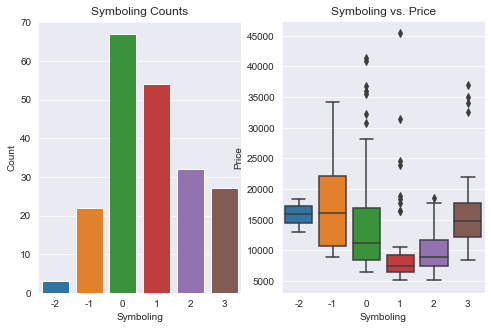

In [9]:
fig,axes = plt.subplots(nrows = 1, ncols = 2)
sns.barplot(ax=axes[0],x = car_data.symboling.value_counts().index,y = car_data.symboling.value_counts().values)
axes[0].set_title('Symboling Counts')
axes[0].set_ylabel("Count")
axes[0].set_xlabel('Symboling')

green_diamond = dict(markerfacecolor='black', marker='d',markersize=5)
temp_list = []
for group in [-2,-1,0,1,2,3]:
    temp_df = car_data.groupby("symboling").get_group(group)['price']
    temp_list.append(temp_df)
sns.boxplot(ax=axes[1],data=temp_list)
axes[1].set_title("Symboling vs. Price")
axes[1].set_ylabel("Price")
axes[1].set_xlabel("Symboling")
axes[1].set_xticklabels([-2,-1,0,1,2,3])

plt.show()

The above graphs show that the most frequent type of symboling is 1, but it also has the lowest average price (though there is one particular outlier that is drastically higher than the average).

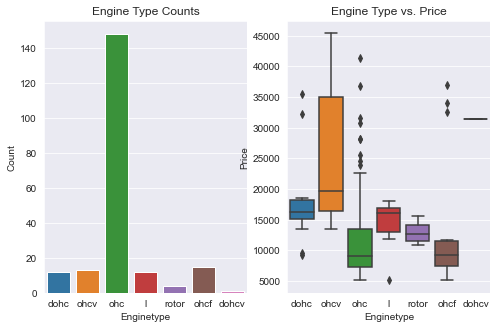

In [10]:
fig,axes = plt.subplots(nrows = 1, ncols = 2)
sns.barplot(ax=axes[0],x = car_data.enginetype.value_counts()[['dohc','ohcv','ohc','l','rotor','ohcf','dohcv']].index,y = car_data.enginetype.value_counts()[['dohc','ohcv','ohc','l','rotor','ohcf','dohcv']].values)
axes[0].set_title('Engine Type Counts')
axes[0].set_ylabel("Count")
axes[0].set_xlabel('Enginetype')

green_diamond = dict(markerfacecolor='black', marker='d',markersize=5)
temp_list = []
for group in car_data.enginetype.unique():
    temp_df = car_data.groupby("enginetype").get_group(group)['price']
    temp_list.append(temp_df)
sns.boxplot(ax=axes[1],data=temp_list)
axes[1].set_title("Engine Type vs. Price")
axes[1].set_ylabel("Price")
axes[1].set_xlabel("Enginetype")
axes[1].set_xticklabels(car_data.enginetype.unique())

plt.show()

The most frequent engine type is the ohc, but that ohcv engine type has the highest average price, even without any outliers.

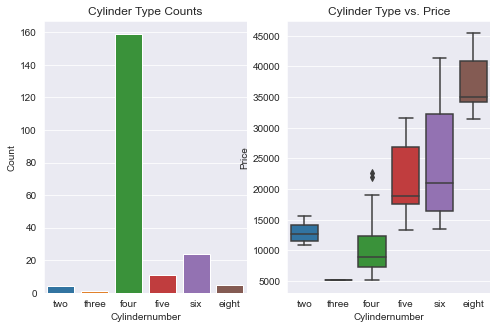

In [11]:
fig,axes = plt.subplots(nrows = 1, ncols = 2)
sns.barplot(ax=axes[0],x = car_data.cylindernumber.value_counts()[['two','three','four','five','six','eight']].index,y = car_data.cylindernumber.value_counts()[['two','three','four','five','six','eight']].values)
axes[0].set_title('Cylinder Type Counts')
axes[0].set_ylabel("Count")
axes[0].set_xlabel('Cylindernumber')

green_diamond = dict(markerfacecolor='black', marker='d',markersize=5)
temp_list = []
for group in ['two','three','four','five','six','eight']:
    temp_df = car_data.groupby("cylindernumber").get_group(group)['price']
    temp_list.append(temp_df)
sns.boxplot(ax=axes[1],data=temp_list)
axes[1].set_title("Cylinder Type vs. Price")
axes[1].set_ylabel("Price")
axes[1].set_xlabel("Cylindernumber")
axes[1].set_xticklabels(['two','three','four','five','six','eight'])

plt.show()

Four cylinders appears to be the most frequent number of cylinders, though it is significantly cheaper than all other cylinder numbers apart from a three cylinder engine.

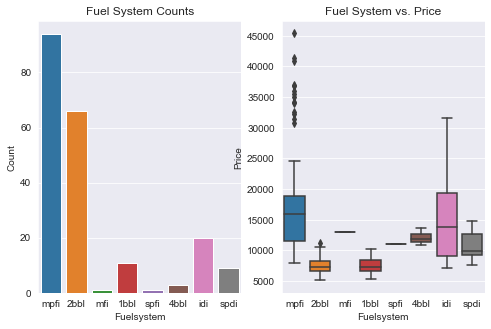

In [12]:
fig,axes = plt.subplots(nrows = 1, ncols = 2)
sns.barplot(ax=axes[0],x = car_data.fuelsystem.value_counts()[['mpfi','2bbl','mfi','1bbl','spfi','4bbl','idi','spdi']].index,y = car_data.fuelsystem.value_counts()[['mpfi','2bbl','mfi','1bbl','spfi','4bbl','idi','spdi']].values)
axes[0].set_title('Fuel System Counts')
axes[0].set_ylabel("Count")
axes[0].set_xlabel('Fuelsystem')

green_diamond = dict(markerfacecolor='black', marker='d',markersize=5)
temp_list = []
for group in ['mpfi','2bbl','mfi','1bbl','spfi','4bbl','idi','spdi']:
    temp_df = car_data.groupby("fuelsystem").get_group(group)['price']
    temp_list.append(temp_df)
sns.boxplot(ax=axes[1],data=temp_list)
axes[1].set_title("Fuel System vs. Price")
axes[1].set_ylabel("Price")
axes[1].set_xlabel("Fuelsystem")
axes[1].set_xticklabels(['mpfi','2bbl','mfi','1bbl','spfi','4bbl','idi','spdi'])

plt.show()

Both the mpfi and 2bbl fuel systems are the most frequent. And while the 2bbl fuel system is the cheapest on average, the mpfi fuel system has a massive price range.

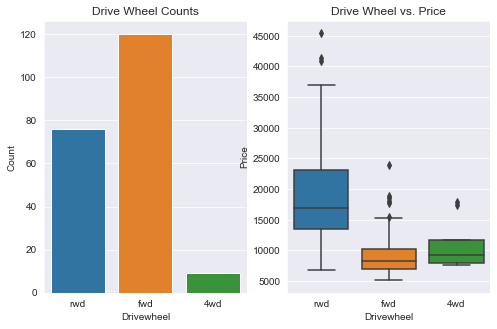

In [13]:
fig,axes = plt.subplots(nrows = 1, ncols = 2)
sns.barplot(ax=axes[0],x = car_data.drivewheel.value_counts()[['rwd','fwd','4wd']].index,y = car_data.drivewheel.value_counts()[['rwd','fwd','4wd']].values)
axes[0].set_title('Drive Wheel Counts')
axes[0].set_ylabel("Count")
axes[0].set_xlabel('Drivewheel')

green_diamond = dict(markerfacecolor='black', marker='d',markersize=5)
temp_list = []
for group in ['rwd','fwd','4wd']:
    temp_df = car_data.groupby("drivewheel").get_group(group)['price']
    temp_list.append(temp_df)
sns.boxplot(ax=axes[1],data=temp_list)
axes[1].set_title("Drive Wheel vs. Price")
axes[1].set_ylabel("Price")
axes[1].set_xlabel("Drivewheel")
axes[1].set_xticklabels(['rwd','fwd','4wd'])

plt.show()

The front-wheel drive system is the most frequent and also has the lowest average price, though there are a few outliers that are above the four-wheel drive system.

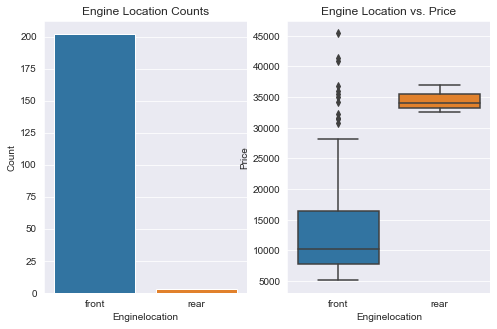

In [14]:
fig,axes = plt.subplots(nrows = 1, ncols = 2)
sns.barplot(ax=axes[0],x = car_data.enginelocation.value_counts()[['front','rear']].index,y = car_data.enginelocation.value_counts()[['front','rear']].values)
axes[0].set_title('Engine Location Counts')
axes[0].set_ylabel("Count")
axes[0].set_xlabel('Enginelocation')

green_diamond = dict(markerfacecolor='black', marker='d',markersize=5)
temp_list = []
for group in ['front','rear']:
    temp_df = car_data.groupby("enginelocation").get_group(group)['price']
    temp_list.append(temp_df)
sns.boxplot(ax=axes[1],data=temp_list)
axes[1].set_title("Engine Location vs. Price")
axes[1].set_ylabel("Price")
axes[1].set_xlabel("Enginelocation")
axes[1].set_xticklabels(['front','rear'])

plt.show()

Only three cars in the dataframe have their engine located in the rear of the car, and they are also (on average) more expensive, though there are a few outlier in the cars with the engine in the front that have a higher price.

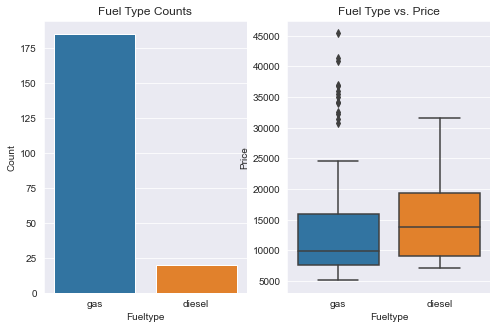

In [15]:
fig,axes = plt.subplots(nrows = 1, ncols = 2)
sns.barplot(ax=axes[0],x = car_data.fueltype.value_counts()[['gas','diesel']].index,y = car_data.fueltype.value_counts()[['gas','diesel']].values)
axes[0].set_title('Fuel Type Counts')
axes[0].set_ylabel("Count")
axes[0].set_xlabel('Fueltype')

green_diamond = dict(markerfacecolor='black', marker='d',markersize=5)
temp_list = []
for group in ['gas','diesel']:
    temp_df = car_data.groupby("fueltype").get_group(group)['price']
    temp_list.append(temp_df)
sns.boxplot(ax=axes[1],data=temp_list)
axes[1].set_title("Fuel Type vs. Price")
axes[1].set_ylabel("Price")
axes[1].set_xlabel("Fueltype")
axes[1].set_xticklabels(['gas','diesel'])

plt.show()

Gas fuel types are the most freqent and have a lower average cost, though again, there are outliers that are higher than those of the diesel fuel type.

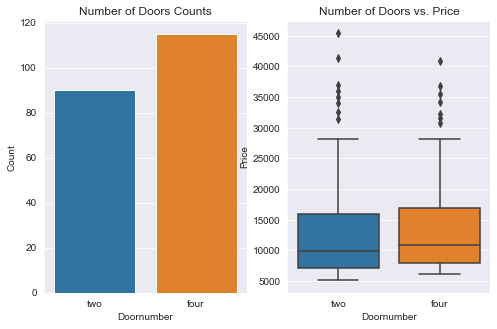

In [16]:
fig,axes = plt.subplots(nrows = 1, ncols = 2)
sns.barplot(ax=axes[0],x = car_data.doornumber.value_counts()[['two','four']].index,y = car_data.doornumber.value_counts()[['two','four']].values)
axes[0].set_title('Number of Doors Counts')
axes[0].set_ylabel("Count")
axes[0].set_xlabel('Doornumber')

green_diamond = dict(markerfacecolor='black', marker='d',markersize=5)
temp_list = []
for group in ['two','four']:
    temp_df = car_data.groupby("doornumber").get_group(group)['price']
    temp_list.append(temp_df)
sns.boxplot(ax=axes[1],data=temp_list)
axes[1].set_title("Number of Doors vs. Price")
axes[1].set_ylabel("Price")
axes[1].set_xlabel("Doornumber")
axes[1].set_xticklabels(['two','four'])

plt.show()

While the number of two-door and four-door cars are relatively even, the outliers amongst the two-door cars put the price range above those of the four-door cars.

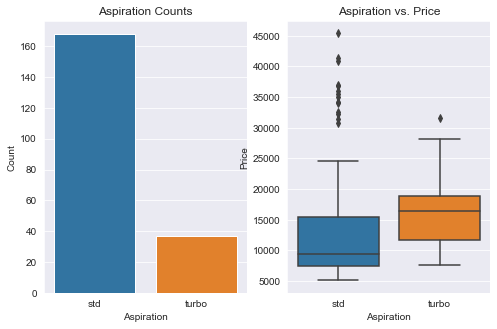

In [17]:
fig,axes = plt.subplots(nrows = 1, ncols = 2)
sns.barplot(ax=axes[0],x = car_data.aspiration.value_counts()[['std','turbo']].index,y = car_data.aspiration.value_counts()[['std','turbo']].values)
axes[0].set_title('Aspiration Counts')
axes[0].set_ylabel("Count")
axes[0].set_xlabel('Aspiration')

green_diamond = dict(markerfacecolor='black', marker='d',markersize=5)
temp_list = []
for group in ['std','turbo']:
    temp_df = car_data.groupby("aspiration").get_group(group)['price']
    temp_list.append(temp_df)
sns.boxplot(ax=axes[1],data=temp_list)
axes[1].set_title("Aspiration vs. Price")
axes[1].set_ylabel("Price")
axes[1].set_xlabel("Aspiration")
axes[1].set_xticklabels(['std','turbo'])

plt.show()

Standard aspiration systems are more frequent, but outliers put the range of prices higher than those with a turbo aspiration system.

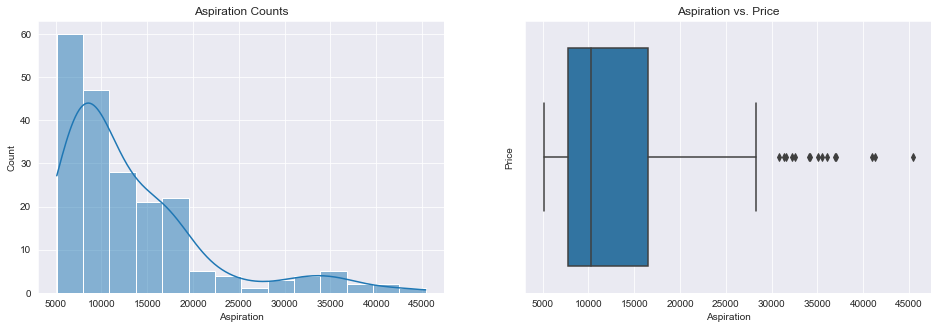

In [18]:
rcParams['figure.figsize'] = 16, 5
sns.set_style('darkgrid')
fig,axes = plt.subplots(nrows = 1, ncols = 2)
sns.histplot(ax=axes[0],x = car_data.price, kde=True)
axes[0].set_title('Aspiration Counts')
axes[0].set_ylabel("Count")
axes[0].set_xlabel('Aspiration')

green_diamond = dict(markerfacecolor='black', marker='d',markersize=5)
temp_list = []
for group in ['std','turbo']:
    temp_df = car_data.groupby("aspiration").get_group(group)['price']
    temp_list.append(temp_df)
sns.boxplot(ax=axes[1],x=car_data['price'])
axes[1].set_title("Aspiration vs. Price")
axes[1].set_ylabel("Price")
axes[1].set_xlabel("Aspiration")

plt.show()

Both of these plots visualize that the data is skewed quite heavily to the right, with more than a few outliers beyond the $30,000 price range.

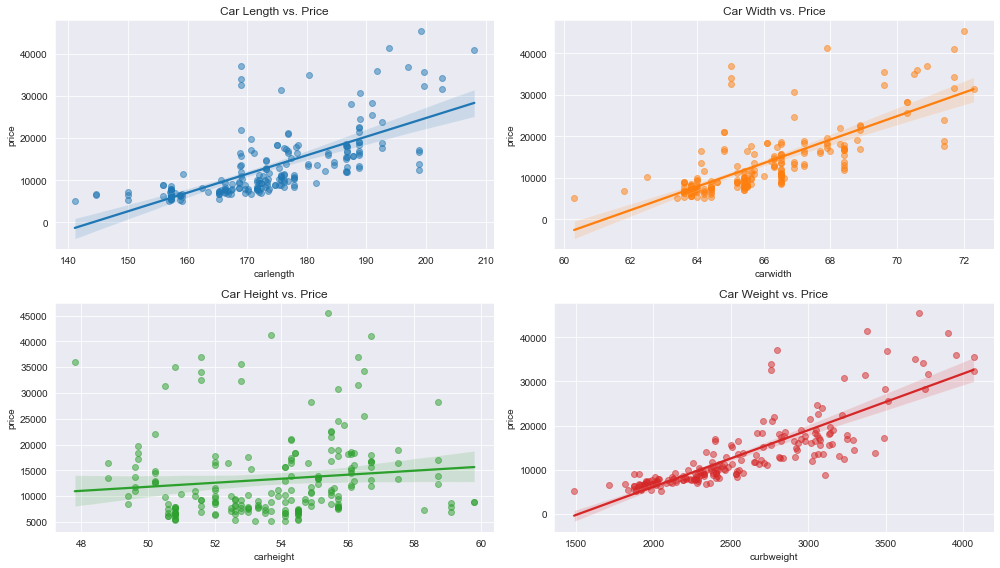

In [19]:
rcParams['figure.figsize'] = 14,8
sns.set_style('darkgrid')
fig,axes = plt.subplots(nrows = 2, ncols = 2)
sns.regplot(ax=axes[0,0],data=car_data, x="carlength", y="price",scatter_kws={'alpha':0.5})
axes[0,0].set_title("Car Length vs. Price")
sns.regplot(ax=axes[0,1],data=car_data, x="carwidth", y="price",color = 'C1',scatter_kws={'alpha':0.5})
axes[0,1].set_title("Car Width vs. Price")
sns.regplot(ax=axes[1,0],data=car_data, x="carheight", y="price",color = 'C2',scatter_kws={'alpha':0.5})
axes[1,0].set_title("Car Height vs. Price")
sns.regplot(ax=axes[1,1],data=car_data, x="curbweight", y="price",color = 'C3',scatter_kws={'alpha':0.5})
axes[1,1].set_title("Car Weight vs. Price")
fig.tight_layout()
plt.show()

As the above graphs show, there is a much stronger correlation between Car Weight and price compared to Car Height and price, which has a very weak correlation

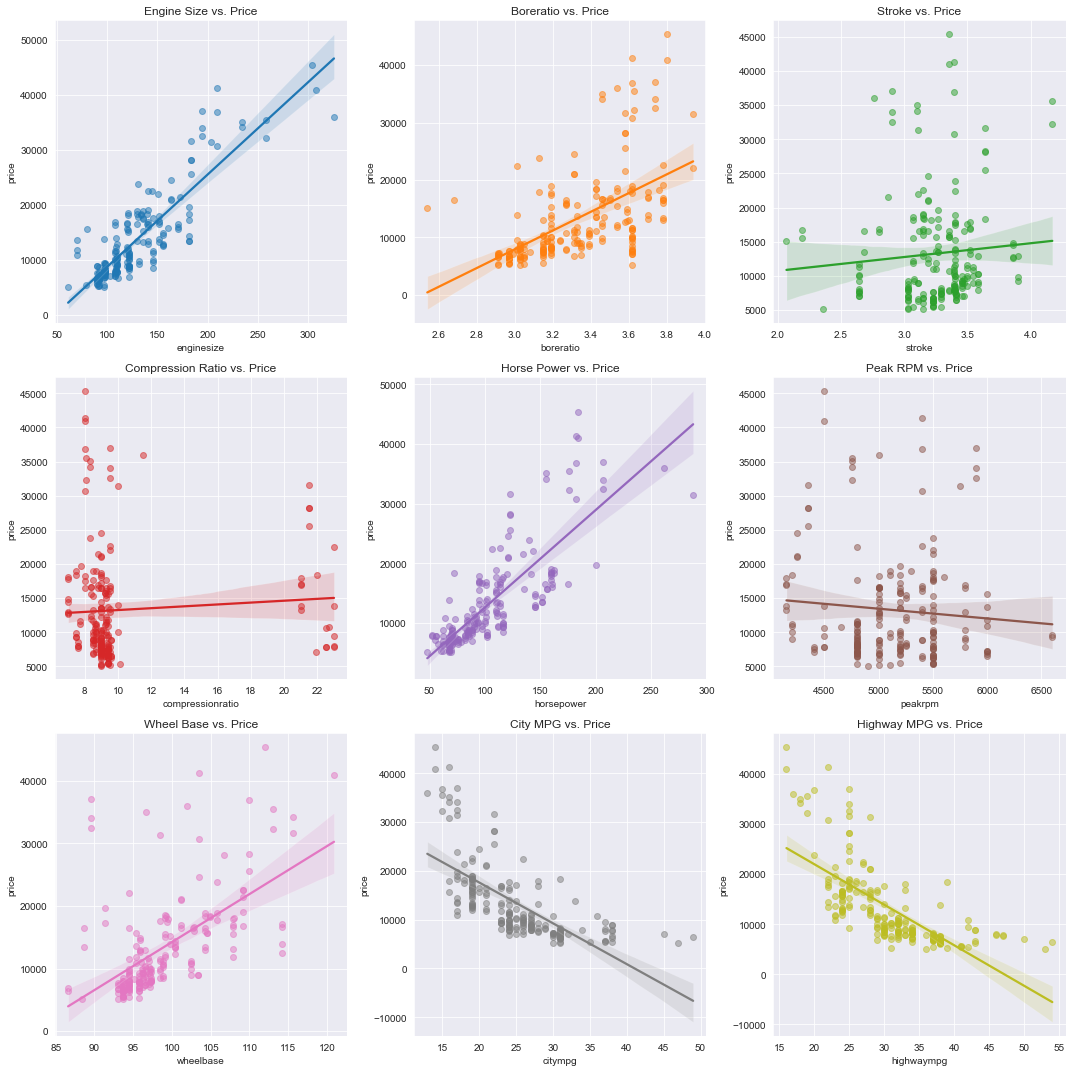

In [20]:
rcParams['figure.figsize'] = 15,15
sns.set_style('darkgrid')
fig,axes = plt.subplots(nrows = 3, ncols = 3)
titles = [['Engine Size vs. Price','Boreratio vs. Price','Stroke vs. Price'],['Compression Ratio vs. Price','Horse Power vs. Price','Peak RPM vs. Price'],['Wheel Base vs. Price','City MPG vs. Price','Highway MPG vs. Price']]
x_list = [['enginesize','boreratio','stroke'],['compressionratio','horsepower','peakrpm'],['wheelbase','citympg','highwaympg']]
colors = [['C0','C1','C2'],['C3','C4','C5'],['C6','C7','C8']]
for x in range(3):
    for y in range(3):
        sns.regplot(ax=axes[x,y],data=car_data, x=x_list[x][y], y="price",scatter_kws={'alpha':0.5},color = colors[x][y])
        axes[x,y].set_title(titles[x][y])

fig.tight_layout()
plt.show()

Engine Size has the highest correlation with price, whereas stroke and compression ratio have the lowest correlation to price amongst the above nine graphs

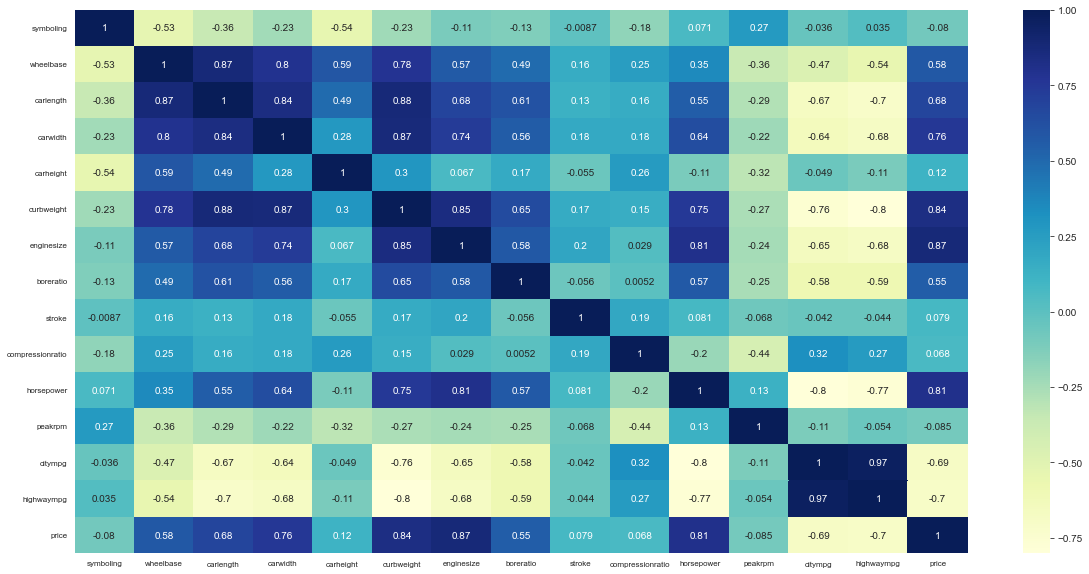

In [21]:
rcParams['figure.figsize'] = 20,10
sns.set_style('darkgrid')
sns.heatmap(car_data[['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']].corr(), cmap="YlGnBu", annot=True,xticklabels='auto')
plt.xticks(rotation=0, fontsize = 8)
plt.yticks(rotation=0, fontsize = 8)
plt.show()

Based on the heatmap, citympg and highwaympg are both highly correlated and can be combined. Another thing we can conclude is that both engine size and curbweight are both fairly highly correlated to the price of the car

In [22]:
temp_data = car_data.drop(columns=['CarName'])
columns = list(temp_data.columns)
columns[-1] = 'CompanyName'
temp_data.columns = columns
temp_data['fueleconomy'] = (temp_data['citympg'] + temp_data['highwaympg'])/2
temp_data.head()

car_ID  symboling fueltype aspiration doornumber      carbody drivewheel  \
0       1          3      gas        std        two  convertible        rwd   
1       2          3      gas        std        two  convertible        rwd   
2       3          1      gas        std        two    hatchback        rwd   
3       4          2      gas        std       four        sedan        fwd   
4       5          2      gas        std       four        sedan        4wd   

  enginelocation  wheelbase  carlength  ...  boreratio  stroke  \
0          front       88.6      168.8  ...       3.47    2.68   
1          front       88.6      168.8  ...       3.47    2.68   
2          front       94.5      171.2  ...       2.68    3.47   
3          front       99.8      176.6  ...       3.19    3.40   
4          front       99.4      176.6  ...       3.19    3.40   

   compressionratio horsepower peakrpm  citympg highwaympg    price  \
0               9.0        111    5000       21         27  13495.0   
1               9.0        111    5000       21         27  16500.0   
2               9.0        154    5000       19         26  16500.0   
3              10.0        102    5500       24         30  13950.0   
4               8.0        115    5500       18         22  17450.0   

   CompanyName  fueleconomy  
0  alfa-romero         24.0  
1  alfa-romero         24.0  
2  alfa-romero         22.5  
3         audi         27.0  
4         audi         20.0  

[5 rows x 27 columns]

Based on all the data, I'd say that both engine size and curbweight, along with carwidth, are going to be the heavy correlative aspects of the data with regards to price

In [23]:
temp_data.drop(columns = ['citympg','highwaympg'],inplace=True)
temp_data = pd.get_dummies(temp_data, columns = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem','CompanyName'])

In [24]:
X = temp_data[['symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'fueleconomy',
       'fueltype_diesel', 'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'doornumber_four', 'doornumber_two', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'CompanyName_nissan',
       'CompanyName_alfa-romero', 'CompanyName_audi', 'CompanyName_bmw',
       'CompanyName_buick', 'CompanyName_chevrolet', 'CompanyName_dodge',
       'CompanyName_honda', 'CompanyName_isuzu', 'CompanyName_jaguar',
       'CompanyName_mazda', 'CompanyName_mercury', 'CompanyName_mitsubishi',
       'CompanyName_nissan', 'CompanyName_peugeot', 'CompanyName_plymouth',
       'CompanyName_porsche', 'CompanyName_renault', 'CompanyName_saab',
       'CompanyName_subaru', 'CompanyName_toyota', 'CompanyName_volkswagen',
       'CompanyName_volvo']]
y = temp_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

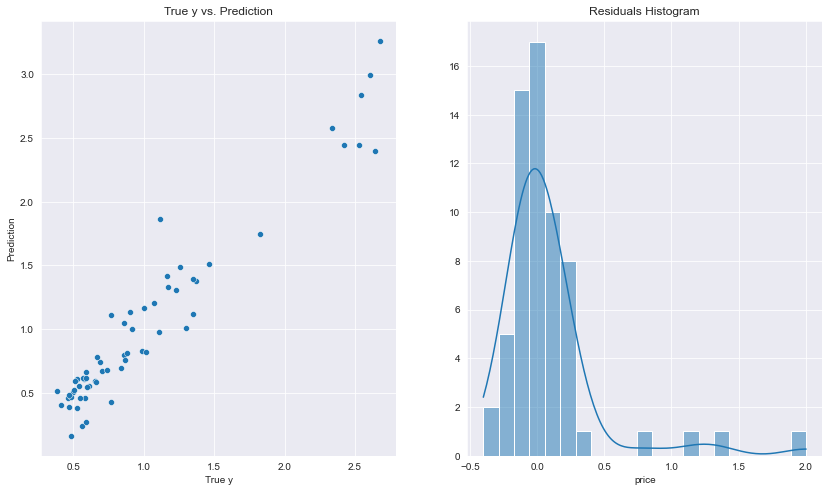

R-squared:  0.8978909802699001


In [31]:
rcParams['figure.figsize'] = 14,8
predictions = lm.predict(X_test)
residuals = (y_test - predictions)/predictions
fig, axes = plt.subplots(ncols=2,nrows=1)

sns.scatterplot(x = y_test/y_test.mean(),y = predictions/y_test.mean(),ax=axes[0])
axes[0].set_xlabel("True y")
axes[0].set_ylabel("Prediction")
axes[0].set_title("True y vs. Prediction")

sns.histplot(residuals,kde=True)
axes[1].set_title("Residuals Histogram")
axes[1].set_ylabel("")

plt.show()
print('R-squared: ', r2_score(y_test, predictions))

In [32]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(coeff_df.sort_values("Coefficient",ascending = False))

                         Coefficient
cylindernumber_three       7.827e+03
CompanyName_bmw            7.809e+03
CompanyName_saab           6.431e+03
CompanyName_porsche        5.813e+03
fuelsystem_idi             4.986e+03
fueltype_diesel            4.986e+03
CompanyName_buick          4.764e+03
CompanyName_audi           4.536e+03
enginelocation_rear        3.623e+03
carbody_convertible        3.359e+03
enginetype_rotor           3.254e+03
cylindernumber_two         3.254e+03
enginetype_ohcf            1.830e+03
fuelsystem_2bbl            1.492e+03
drivewheel_rwd             1.446e+03
enginetype_l               1.214e+03
carwidth                   9.975e+02
aspiration_turbo           7.488e+02
CompanyName_honda          7.321e+02
fuelsystem_spfi            6.847e+02
CompanyName_volkswagen     6.164e+02
cylindernumber_four        5.637e+02
drivewheel_fwd             3.452e+02
fuelsystem_mfi             2.801e+02
CompanyName_alfa-romero    2.595e+02
wheelbase                  2.377e+02
e

Based on the data used, I'd argue that the most impactful aspects of the dataframe involve both the higher end companies (BMW, Porsche, and Saab) and certain aspects such as having three cylinders, having an idi fuel system, and having a diesel fuel type